In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kml-2024-s-final-exam/sample_submission.csv
/kaggle/input/kml-2024-s-final-exam/train.csv
/kaggle/input/kml-2024-s-final-exam/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

In [3]:
train = pd.read_csv('/kaggle/input/kml-2024-s-final-exam/train.csv')
test = pd.read_csv('/kaggle/input/kml-2024-s-final-exam/test.csv')

In [4]:
train

,id,num01,num02,cat01,cat02,cat03,cat04,cat05,cat06,cat07,cat08,target
0,SID100109,0,70.0,6,67,18,326,NaN,1,2147745792,NaN,21
1,SID100255,35,NaN,2,49,24,263,9.0,1,790528,4.0,21
2,SID100284,0,60.0,0,105,23,1594,NaN,0,2147745792,NaN,19
3,SID100315,12,70.0,7,19,23,1590,NaN,0,2147745824,4.0,25
4,SID100374,0,70.0,3,24,34,1969,NaN,1,2048,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...,...
16565,SID99558,0,80.0,9,17,29,1770,NaN,0,2147746304,NaN,17
16566,SID99611,0,70.0,2,7,18,2013,NaN,0,2147745792,NaN,21
16567,SID99741,0,70.0,2,49,23,97,21.0,0,2147753984,NaN,17
16568,SID99756,0,70.0,10,29,19,1844,NaN,1,262144,NaN,17


In [5]:
X_train = train.drop(columns=['id','target'])
y_train = train.target
X_test = test.drop(columns=['id'])
X = pd.concat([X_train,X_test])

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10)
X[['num02']] = imputer.fit_transform(X[['num02']])

In [7]:
X['cat05'].fillna(-9999, inplace=True)

In [8]:
X['cat08'].fillna(-9999, inplace=True)

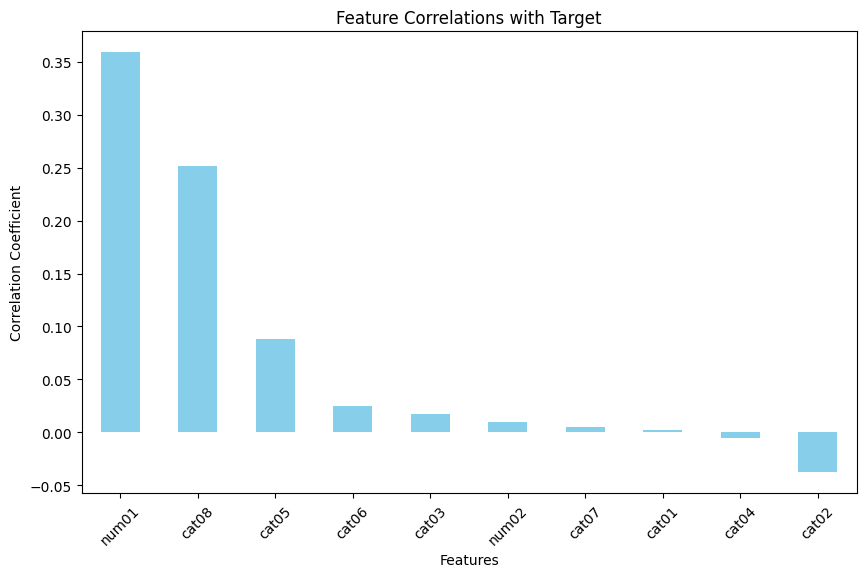

In [9]:
correlation_matrix = X.corrwith(y_train)
plt.figure(figsize=(10, 6))
correlation_matrix.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with Target')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [10]:
X['num01*num02']= X['num01']*X['num02']
X['num01+num02']=X['num01']+X['num02']
X['num01-num02']=X['num01']-X['num02']
X['num01*cat08']= X['num01']*X['cat08']
X['num01*cat05']= X['num01']*X['cat05']
X['num01*cat02']= X['num01']*X['cat02']

In [11]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat08'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [12]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat08'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [13]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat01'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [14]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat01'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [15]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat02'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [16]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat02'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [17]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat03'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [18]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat03'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [19]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat05'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [20]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat05'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [21]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat06'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [22]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat06'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [23]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat07'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [24]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat07'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [25]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat04'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [26]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat04'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [27]:
X['log_num01'] = np.log1p(X['num01'])

In [28]:
X.columns

Index(['num01', 'num02', 'cat01', 'cat02', 'cat03', 'cat04', 'cat05', 'cat06',
       'cat07', 'cat08', 'num01*num02', 'num01+num02', 'num01-num02',
       'num01*cat08', 'num01*cat05', 'num01*cat02', 'Mean_num01_By_cat08',
       'Mean_num02_By_cat08', 'Mean_num01_By_cat01', 'Mean_num02_By_cat01',
       'Mean_num01_By_cat02', 'Mean_num02_By_cat02', 'Mean_num01_By_cat03',
       'Mean_num02_By_cat03', 'Mean_num01_By_cat05', 'Mean_num02_By_cat05',
       'Mean_num01_By_cat06', 'Mean_num02_By_cat06', 'Mean_num01_By_cat07',
       'Mean_num02_By_cat07', 'Mean_num01_By_cat04', 'Mean_num02_By_cat04',
       'log_num01'],
      dtype='object')

In [29]:
con = ['num01', 'num02', 'cat04', 'num01*num02', 'num01+num02', 'num01-num02',
       'num01*cat08', 'num01*cat05', 'num01*cat02', 'Mean_num01_By_cat08',
       'Mean_num02_By_cat08', 'Mean_num01_By_cat01', 'Mean_num02_By_cat01',
       'Mean_num01_By_cat02', 'Mean_num02_By_cat02', 'Mean_num01_By_cat03',
       'Mean_num02_By_cat03', 'Mean_num01_By_cat05', 'Mean_num02_By_cat05',
       'Mean_num01_By_cat06', 'Mean_num02_By_cat06', 'Mean_num01_By_cat07',
       'Mean_num02_By_cat07', 'log_num01', 'Mean_num01_By_cat04',
       'Mean_num02_By_cat04']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[con] = scaler.fit(X[con]).transform(X[con])

In [31]:
num_train = len(X_train)
X_train = X[:num_train]
X_test = X[num_train:]

In [32]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingRegressor

In [33]:
#xgboost
def objective(trial):
    param = {
        'tree_method': 'hist',  # GPU 대신 사용할 트리 메서드
        'device': 'cuda',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'random_state': 42
    }
    
    model = XGBRegressor(**param)
    score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    mse = score.mean()*-1
    return np.sqrt(mse)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, n_jobs=-1)

print("Best score:", study.best_value)
print("Best trial:", study.best_trial)

[I 2024-06-13 08:23:22,861] A new study created in memory with name: no-name-6748806e-3fa1-4c5d-87a8-2eb7a46982e1
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:23:43] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:23:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Po

Best score: 2.933859808282563
Best trial: FrozenTrial(number=2, state=TrialState.COMPLETE, values=[2.933859808282563], datetime_start=datetime.datetime(2024, 6, 13, 8, 23, 22, 871765), datetime_complete=datetime.datetime(2024, 6, 13, 8, 25, 6, 248055), params={'n_estimators': 531, 'max_depth': 8, 'learning_rate': 0.01730983506901827, 'min_child_weight': 8, 'subsample': 0.6989479932756002, 'colsample_bytree': 0.5513151126440126, 'gamma': 2.247879501641572, 'reg_alpha': 1.4888212648645332e-06, 'reg_lambda': 0.007924777448470954}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=15, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.0001, step=None), 'min_child_weight': IntDistribution(high=10, log=False, low=1, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribut

In [34]:
xgb = XGBRegressor(**{'n_estimators': 343, 'max_depth': 5, 'learning_rate': 0.03923322635827775, 'min_child_weight': 10, 'subsample': 0.8359556052315522, 'colsample_bytree': 0.7916273144992284, 'gamma': 3.4604144824790017, 'reg_alpha': 0.0005195098328849087, 'reg_lambda': 0.0001148934091628259})
score = cross_val_score(xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
score.mean() *-1

8.611937625481833

In [35]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7916273144992284, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=3.4604144824790017,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03923322635827775,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=343, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
xgb_pred_2=xgb.predict(X_test)

In [37]:
pd.DataFrame({'id': test.id, 'target': xgb_pred_2}).to_csv('xgb_pred_2.csv', index=False)